# **Proyek Analisis Data: Bike_sharing_dataset**  
**Nama**: Muhammad Azhar Fikri  
**Email**: muhammadazharfikri990@gmail.com

## **Pertanyaan Bisnis**
*   **Q1: Kapan jam terlaris penyewaan sepeda?**
*   **Q2: Berapa banyak rata-rata sepeda yang disewa tiap harinya?**
*   **Q3: Bagaimana distribusi jumlah penyewaan sepeda berdasarkan cuaca?**

## **Menyiapkan semua library yang dibutuhkan**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Gathering data**
Dataset penggunaan sepeda menyediakan data **harian** (`day.csv`) dan data **jam** (`hour.csv`).

In [9]:
day_df = pd.read_csv("./datasets/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
hour_df = pd.read_csv("./datasets/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

#### Menilai tabel `day_df`

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
def detect_outliers(df):
    outliers_count = {}

    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))

        outliers_count[column] = outliers.sum()

    return outliers_count

outliers_count_day_df = detect_outliers(day_df)

print(outliers_count_day_df)

{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 21, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
def detect_outliers(df):
    outliers_count = {}

    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))

        outliers_count[column] = outliers.sum()

    return outliers_count

outliers_count_hour_df = detect_outliers(hour_df)

print(outliers_count_hour_df)

{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 500, 'weekday': 0, 'workingday': 0, 'weathersit': 3, 'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### **Cleaning Data**

#### Membersihkan tabel `day_df`

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

In [ ]:
day_df.drop_duplicates(inplace=True)

In [ ]:
day_df.ffill(inplace=True)

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(2), datetime64

#### Membersihkan tabel `hour_df`

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df['season'] = hour_df['season'].astype('category')
hour_df['hr'] = hour_df['hr'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [ ]:
hour_df.drop_duplicates(inplace=True)

In [ ]:
hour_df.ffill(inplace=True)

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## **Exploratory Data Analysis (EDA)**

### Explore `day_df`

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
397,398,2012-02-02,1,1,2,0,4,1,2,0.399167,0.398971,0.672917,0.187187,190,3571,3761
300,301,2011-10-28,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747
51,52,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
459,460,2012-04-04,2,1,4,0,3,1,1,0.541667,0.533450,0.469583,0.180975,1058,5378,6436
268,269,2011-09-26,4,0,9,0,1,1,2,0.649167,0.589042,0.848333,0.110700,684,3946,4630


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,NaN,NaN,NaN,NaN,NaN,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Explore `hour_df`

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7614,7615,2011-11-18,4,0,11,21,0,5,1,1,0.28,0.2727,0.48,0.1642,3,108,111
15140,15141,2012-09-28,4,1,9,1,0,5,1,3,0.60,0.5455,0.88,0.0000,0,13,13
12476,12477,2012-06-09,2,1,6,1,0,6,0,1,0.64,0.6212,0.53,0.0896,34,89,123
2725,2726,2011-04-28,2,0,4,11,0,4,1,2,0.62,0.5758,0.83,0.2836,10,74,84
2208,2209,2011-04-06,2,0,4,21,0,3,1,1,0.46,0.4545,0.41,0.2836,18,84,102


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,NaN,NaN,24.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,17.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,NaN,NaN,730.0,NaN,NaN,NaN,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,NaN,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,NaN,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,NaN,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,NaN,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,NaN,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Mengelompokkan data

#### Berdasarkan `season`

In [ ]:
agg_data = day_df.groupby('season', observed=True).agg({'cnt': ['sum', 'min', 'max', 'mean']})
agg_data.columns = ['total', 'min', 'max', 'avg']
agg_data = agg_data.reset_index()

print(agg_data)

  season    total   min   max          avg
0      1   471348   431  7836  2604.132597
1      2   918589   795  8362  4992.331522
2      3  1061129  1115  8714  5644.303191
3      4   841613    22  8555  4728.162921


#### Berdasarkan `Weather`

In [ ]:
agg_data = day_df.groupby('weathersit', observed=True).agg({'cnt': ['sum', 'min', 'max', 'mean']})
agg_data.columns = ['total', 'min', 'max', 'avg']
agg_data = agg_data.reset_index()

print(agg_data)

  weathersit    total  min   max          avg
0          1  2257952  431  8714  4876.786177
1          2   996858  605  8362  4035.862348
2          3    37869   22  4639  1803.285714


## **Visualization & Explanatory Analysis**

### **Q1: Kapan jam terlaris penyewaan sepeda?**

In [11]:
peak_hour = hour_df.groupby('hr')['cnt'].sum().idxmax()
print(f"Jam terlaris: {peak_hour}")

Jam terlaris: 17


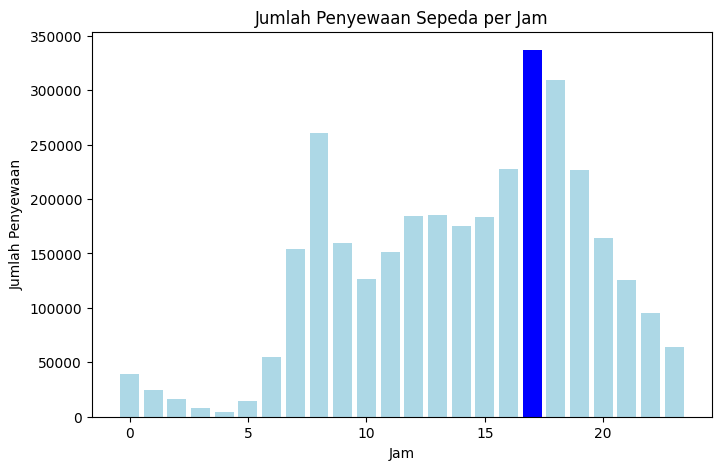

In [15]:
rentals_per_hour = hour_df.groupby('hr')['cnt'].sum()

peak_hour = rentals_per_hour.idxmax()

plt.figure(figsize=(8, 5))
plt.bar(rentals_per_hour.index, rentals_per_hour.values, color='lightblue')

plt.bar(peak_hour, rentals_per_hour[peak_hour], color='blue')

plt.title('Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')

plt.show()

### **Q2: Berapa banyak rata-rata sepeda yang disewa tiap harinya??**

In [ ]:
avg_rentals_per_day = hour_df.groupby(hour_df['dteday'].dt.date)['cnt'].mean()
print(f"Rata-rata sepeda yang disewa setiap hari: {avg_rentals_per_day}")

ovr_avg_rentals = avg_rentals_per_day.mean()
print(f"\nRata-rata keseluruhan penyewaan sepeda setiap hari: {ovr_avg_rentals:.2f}")

Rata-rata sepeda yang disewa setiap hari: dteday
2011-01-01     41.041667
2011-01-02     34.826087
2011-01-03     61.318182
2011-01-04     67.913043
2011-01-05     69.565217
                 ...    
2012-12-27     88.083333
2012-12-28    128.958333
2012-12-29     55.875000
2012-12-30     74.833333
2012-12-31    113.708333
Name: cnt, Length: 731, dtype: float64

Rata-rata keseluruhan penyewaan sepeda setiap hari: 188.42


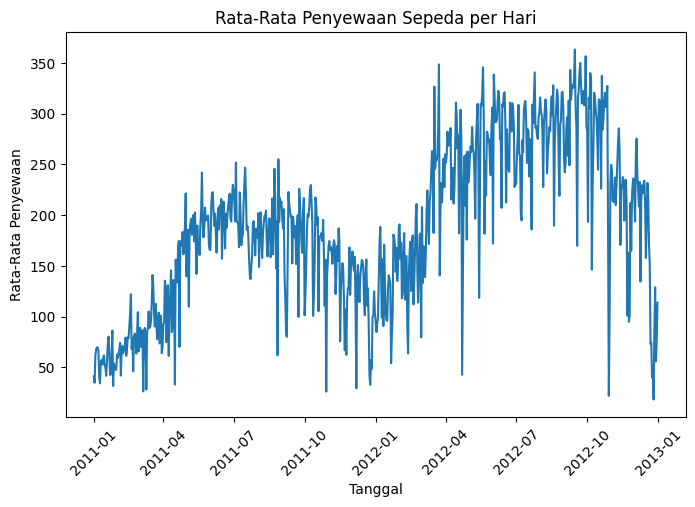

In [ ]:
avg_rentals_df = avg_rentals_per_day.reset_index()
avg_rentals_df.columns = ['date', 'average_rentals']

plt.figure(figsize=(8, 5))

plt.plot(avg_rentals_df['date'], avg_rentals_df['average_rentals'])
plt.title('Rata-Rata Penyewaan Sepeda per Hari')

plt.xlabel('Tanggal')
plt.xticks(rotation=45)

plt.ylabel('Rata-Rata Penyewaan')

plt.show()

### **Q3: Bagaimana distribusi jumlah penyewaan sepeda berdasarkan cuaca?**

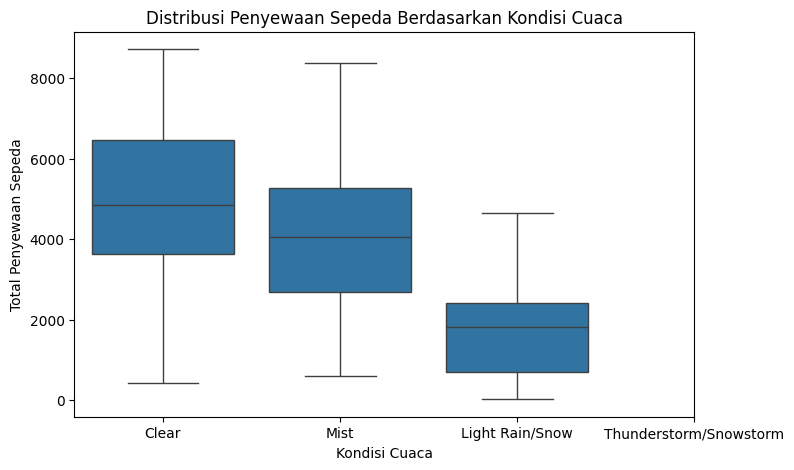

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)

plt.xticks([0, 1, 2, 3], ["Clear", "Mist", "Light Rain/Snow", "Thunderstorm/Snowstorm"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")

plt.show()

## **Kesimpulan**
*   **A1: Menggunakan analisis frekuensi, di mana data dikelompokkan berdasarkan jam, kemudian dihitung jumlah penyewaan sepeda pada setiap jam. Jam dengan jumlah penyewaan tertinggi menunjukkan waktu paling ramai untuk menyewa sepeda. Berdasarkan data yang dianalisis, puncak penyewaan terjadi pada pukul 17.00.**
*   **A2: Dengan statistik deskriptif, terutama dalam perhitungan nilai rata-rata. Data dikelompokkan berdasarkan hari, lalu dihitung rata-rata jumlah penyewaan sepeda untuk setiap harinya. Dari hasil analisis, terlihat bahwa jumlah penyewaan sepeda cenderung mengalami fluktuasi, naik dan turun seiring waktU.**
*   **A3: Grafik ini menunjukkan bahwa jumlah penyewaan sepeda bervariasi tergantung pada kondisi cuaca. Pada cuaca cerah jumlah penyewaan sepeda cenderung lebih tinggi dengan median yang lebih besar dibandingkan kondisi cuaca lainnya. Saat cuaca berkabut atau hujan ringan/salju jumlah penyewaan menurun. Kondisi cuaca ekstrem seperti badai petir/salju lebat memiliki jumlah penyewaan sepeda paling sedikit, kemungkinan karena kondisi yang kurang mendukung untuk bersepeda.**